In [333]:
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

from spotipy.oauth2 import SpotifyClientCredentials

# some code generated by ChatGPT

# Initialize Spotipy with your client credentials
client_credentials_manager = SpotifyClientCredentials(client_id='732cc344f7a24a8999f17b957169ca17', client_secret='f6d420cba9f842a9bf4e3bc80cb8577c')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


## spotify data processing

In [334]:
# list of all korean releases
album_names = [
    "Season of Glass", 
    "Flower Bud",
    "Snowflake",
    "LOL",
    "The Awakening",
    "Parallel",
    "Rainbow",
    "Time for the Moon Night",
    "Sunny Summer",
    "Time for Us",
    "Fever Season",
    "回: Labyrinth",
    "回: Song of the Sirens",
    "回: Walpurgis Night"
]

# Function to search for an album by name
def search_album(album_name, artist_name):
    # Perform the search for the album
    results = sp.search(q = f'album:{album_name} artist:{artist_name}', type = 'album')
    
    if results['albums']['items']:
        album_info = results['albums']['items'][0]  # Get the first matching album
        album_id = album_info['id']  # Get the album ID
        return album_info, album_id  
    else:
        return None

# Function to retrieve tracks from an album
def get_album_tracks(album_id):
    tracks = []
    offset = 0
    limit = 50  # Maximum number of tracks to retrieve per request
    while True:
        results = sp.album_tracks(album_id, offset = offset, limit = limit)
        tracks.extend(results['items'])
        offset += limit
        if len(results['items']) < limit:
            break  
    return tracks

# Function to retrieve audio features for a track
def get_audio_features(track_id):
    audio_features = sp.audio_features([track_id])
    return audio_features[0] if audio_features else None


In [335]:
song_data = {}

# Loop through each album
for album_name in album_names:
    album_info, album_id = search_album(album_name, "GFRIEND")
    if album_info:
        tracks = get_album_tracks(album_id)
        for track in tracks:
            track_id = track['id']

            full_track_info = sp.track(track_id)
            track_info = {
                'Album': full_track_info['album']['name'],
                'Artist': full_track_info['artists'][0]['name'],
                'Track Name': full_track_info['name'],
                'Track ID': full_track_info['id'],
                'Popularity': full_track_info['popularity']
            }
            audio_features = get_audio_features(track_id)
            if audio_features:
                track_info.update(audio_features)
            song_data[track_id] = track_info

df = pd.DataFrame(song_data.values())

# Initialize Album_ID starting from 1 onwards 
df['Album_ID'] = pd.factorize(df['Album'])[0] + 1

In [336]:
df[df["Album"] == "回:Walpurgis Night"] # small confirmation check

,Album,Artist,Track Name,Track ID,Popularity,danceability,energy,key,loudness,mode,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Album_ID
100,回:Walpurgis Night,GFRIEND,MAGO,46WaBBaEHzgbN88Ew0nh50,67,0.621,0.821,6,-3.662,0,...,0.646,120.062,audio_features,46WaBBaEHzgbN88Ew0nh50,spotify:track:46WaBBaEHzgbN88Ew0nh50,https://api.spotify.com/v1/tracks/46WaBBaEHzgb...,https://api.spotify.com/v1/audio-analysis/46Wa...,199133,4,14
101,回:Walpurgis Night,GFRIEND,Love Spell,4Uzm5cTv6oBWSGiUSqziJI,35,0.632,0.921,2,-1.574,1,...,0.950,120.005,audio_features,4Uzm5cTv6oBWSGiUSqziJI,spotify:track:4Uzm5cTv6oBWSGiUSqziJI,https://api.spotify.com/v1/tracks/4Uzm5cTv6oBW...,https://api.spotify.com/v1/audio-analysis/4Uzm...,188013,4,14
102,回:Walpurgis Night,GFRIEND,Three Of Cups,6fenoNqjmMJbrXKfoIuXr2,39,0.673,0.910,6,-1.560,0,...,0.776,115.946,audio_features,6fenoNqjmMJbrXKfoIuXr2,spotify:track:6fenoNqjmMJbrXKfoIuXr2,https://api.spotify.com/v1/tracks/6fenoNqjmMJb...,https://api.spotify.com/v1/audio-analysis/6fen...,208773,4,14
103,回:Walpurgis Night,GFRIEND,GRWM,3BlAKTx6kbfjqWBoqaaY5u,37,0.758,0.900,0,-1.332,1,...,0.604,125.042,audio_features,3BlAKTx6kbfjqWBoqaaY5u,spotify:track:3BlAKTx6kbfjqWBoqaaY5u,https://api.spotify.com/v1/tracks/3BlAKTx6kbfj...,https://api.spotify.com/v1/audio-analysis/3BlA...,210347,4,14
104,回:Walpurgis Night,GFRIEND,Secret Diary,26CA4JrYMqteeAV5nqAuDC,33,0.681,0.716,2,-3.348,1,...,0.638,96.062,audio_features,26CA4JrYMqteeAV5nqAuDC,spotify:track:26CA4JrYMqteeAV5nqAuDC,https://api.spotify.com/v1/tracks/26CA4JrYMqte...,https://api.spotify.com/v1/audio-analysis/26CA...,193680,4,14
105,回:Walpurgis Night,GFRIEND,Better Me,7sikv3XMiEIDESAS7PEkBB,40,0.689,0.843,5,-2.623,0,...,0.609,94.052,audio_features,7sikv3XMiEIDESAS7PEkBB,spotify:track:7sikv3XMiEIDESAS7PEkBB,https://api.spotify.com/v1/tracks/7sikv3XMiEID...,https://api.spotify.com/v1/audio-analysis/7sik...,181147,4,14
106,回:Walpurgis Night,GFRIEND,Night Drive,7azmn7M9mRnHzyqxzjMsNe,43,0.613,0.649,5,-3.899,0,...,0.394,88.956,audio_features,7azmn7M9mRnHzyqxzjMsNe,spotify:track:7azmn7M9mRnHzyqxzjMsNe,https://api.spotify.com/v1/tracks/7azmn7M9mRnH...,https://api.spotify.com/v1/audio-analysis/7azm...,207293,4,14
107,回:Walpurgis Night,GFRIEND,Apple,1j6VvjYG0YrkMTcyCBHj8F,48,0.711,0.939,9,-4.725,1,...,0.331,119.996,audio_features,1j6VvjYG0YrkMTcyCBHj8F,spotify:track:1j6VvjYG0YrkMTcyCBHj8F,https://api.spotify.com/v1/tracks/1j6VvjYG0Yrk...,https://api.spotify.com/v1/audio-analysis/1j6V...,206588,4,14
108,回:Walpurgis Night,GFRIEND,Crossroads,0LZK17dJosyY7zftjUY4mK,41,0.376,0.834,1,-1.882,1,...,0.484,169.900,audio_features,0LZK17dJosyY7zftjUY4mK,spotify:track:0LZK17dJosyY7zftjUY4mK,https://api.spotify.com/v1/tracks/0LZK17dJosyY...,https://api.spotify.com/v1/audio-analysis/0LZK...,202427,4,14
109,回:Walpurgis Night,GFRIEND,Labyrinth,0Z5IHhsYyaAFJ8JeULl4PW,38,0.623,0.898,2,-2.441,0,...,0.858,124.961,audio_features,0Z5IHhsYyaAFJ8JeULl4PW,spotify:track:0Z5IHhsYyaAFJ8JeULl4PW,https://api.spotify.com/v1/tracks/0Z5IHhsYyaAF...,https://api.spotify.com/v1/audio-analysis/0Z5I...,201120,4,14


In [337]:
df

,Album,Artist,Track Name,Track ID,Popularity,danceability,energy,key,loudness,mode,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Album_ID
0,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,Intro (Season of Glass),6gvbHwXLkfe5CYkGoPs9g6,21,0.643,0.369,5,-10.732,0,...,0.550,97.955,audio_features,6gvbHwXLkfe5CYkGoPs9g6,spotify:track:6gvbHwXLkfe5CYkGoPs9g6,https://api.spotify.com/v1/tracks/6gvbHwXLkfe5...,https://api.spotify.com/v1/audio-analysis/6gvb...,73557,4,1
1,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,Glass Bead,2rFRa1eJ8RqlINbJCZwdtt,55,0.695,0.870,6,-2.660,1,...,0.697,114.022,audio_features,2rFRa1eJ8RqlINbJCZwdtt,spotify:track:2rFRa1eJ8RqlINbJCZwdtt,https://api.spotify.com/v1/tracks/2rFRa1eJ8Rql...,https://api.spotify.com/v1/audio-analysis/2rFR...,203482,4,1
2,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,Neverland,7GFlY3Aigy7AbhnwX6Mk9d,33,0.741,0.896,10,-3.406,1,...,0.759,126.038,audio_features,7GFlY3Aigy7AbhnwX6Mk9d,spotify:track:7GFlY3Aigy7AbhnwX6Mk9d,https://api.spotify.com/v1/tracks/7GFlY3Aigy7A...,https://api.spotify.com/v1/audio-analysis/7GFl...,191315,4,1
3,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,White,7BuGnjX5DpKuJ0OdRUpDnV,39,0.666,0.811,0,-3.448,1,...,0.399,97.007,audio_features,7BuGnjX5DpKuJ0OdRUpDnV,spotify:track:7BuGnjX5DpKuJ0OdRUpDnV,https://api.spotify.com/v1/tracks/7BuGnjX5DpKu...,https://api.spotify.com/v1/audio-analysis/7BuG...,225720,4,1
4,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,Glass Bead (Inst.),2XsXB2Vo2IlrBUIgZ5Bfbk,21,0.635,0.832,6,-5.709,1,...,0.581,114.006,audio_features,2XsXB2Vo2IlrBUIgZ5Bfbk,spotify:track:2XsXB2Vo2IlrBUIgZ5Bfbk,https://api.spotify.com/v1/tracks/2XsXB2Vo2Ilr...,https://api.spotify.com/v1/audio-analysis/2XsX...,203482,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,回:Walpurgis Night,GFRIEND,Night Drive,7azmn7M9mRnHzyqxzjMsNe,43,0.613,0.649,5,-3.899,0,...,0.394,88.956,audio_features,7azmn7M9mRnHzyqxzjMsNe,spotify:track:7azmn7M9mRnHzyqxzjMsNe,https://api.spotify.com/v1/tracks/7azmn7M9mRnH...,https://api.spotify.com/v1/audio-analysis/7azm...,207293,4,14
107,回:Walpurgis Night,GFRIEND,Apple,1j6VvjYG0YrkMTcyCBHj8F,48,0.711,0.939,9,-4.725,1,...,0.331,119.996,audio_features,1j6VvjYG0YrkMTcyCBHj8F,spotify:track:1j6VvjYG0YrkMTcyCBHj8F,https://api.spotify.com/v1/tracks/1j6VvjYG0Yrk...,https://api.spotify.com/v1/audio-analysis/1j6V...,206588,4,14
108,回:Walpurgis Night,GFRIEND,Crossroads,0LZK17dJosyY7zftjUY4mK,41,0.376,0.834,1,-1.882,1,...,0.484,169.900,audio_features,0LZK17dJosyY7zftjUY4mK,spotify:track:0LZK17dJosyY7zftjUY4mK,https://api.spotify.com/v1/tracks/0LZK17dJosyY...,https://api.spotify.com/v1/audio-analysis/0LZK...,202427,4,14
109,回:Walpurgis Night,GFRIEND,Labyrinth,0Z5IHhsYyaAFJ8JeULl4PW,38,0.623,0.898,2,-2.441,0,...,0.858,124.961,audio_features,0Z5IHhsYyaAFJ8JeULl4PW,spotify:track:0Z5IHhsYyaAFJ8JeULl4PW,https://api.spotify.com/v1/tracks/0Z5IHhsYyaAF...,https://api.spotify.com/v1/audio-analysis/0Z5I...,201120,4,14


In [338]:
# drop all instrumentals and intro tracks (non-vocal tracks)
df = df.drop([0, 4, 5, 10, 11, 17, 18, 29, 36, 43, 44, 53, 54, 61, 79, 87])

Index(['Album', 'Artist', 'Track Name', 'Track ID', 'Popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'Album_ID'],
      dtype='object')


In [339]:
df

,Album,Artist,Track Name,Track ID,Popularity,danceability,energy,key,loudness,mode,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Album_ID
1,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,Glass Bead,2rFRa1eJ8RqlINbJCZwdtt,55,0.695,0.870,6,-2.660,1,...,0.697,114.022,audio_features,2rFRa1eJ8RqlINbJCZwdtt,spotify:track:2rFRa1eJ8RqlINbJCZwdtt,https://api.spotify.com/v1/tracks/2rFRa1eJ8Rql...,https://api.spotify.com/v1/audio-analysis/2rFR...,203482,4,1
2,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,Neverland,7GFlY3Aigy7AbhnwX6Mk9d,33,0.741,0.896,10,-3.406,1,...,0.759,126.038,audio_features,7GFlY3Aigy7AbhnwX6Mk9d,spotify:track:7GFlY3Aigy7AbhnwX6Mk9d,https://api.spotify.com/v1/tracks/7GFlY3Aigy7A...,https://api.spotify.com/v1/audio-analysis/7GFl...,191315,4,1
3,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,White,7BuGnjX5DpKuJ0OdRUpDnV,39,0.666,0.811,0,-3.448,1,...,0.399,97.007,audio_features,7BuGnjX5DpKuJ0OdRUpDnV,spotify:track:7BuGnjX5DpKuJ0OdRUpDnV,https://api.spotify.com/v1/tracks/7BuGnjX5DpKu...,https://api.spotify.com/v1/audio-analysis/7BuG...,225720,4,1
6,GFRIEND 2nd Mini Album 'Flower Bud',GFRIEND,Me Gustas Tu,6x7fux7bZEfnChKx3nhSZn,63,0.646,0.923,8,-1.309,1,...,0.703,106.086,audio_features,6x7fux7bZEfnChKx3nhSZn,spotify:track:6x7fux7bZEfnChKx3nhSZn,https://api.spotify.com/v1/tracks/6x7fux7bZEfn...,https://api.spotify.com/v1/audio-analysis/6x7f...,220745,4,2
7,GFRIEND 2nd Mini Album 'Flower Bud',GFRIEND,Under The Sky,3RDnqiCqgA0Vg6z2NAxQqY,33,0.644,0.906,2,-2.834,1,...,0.793,120.002,audio_features,3RDnqiCqgA0Vg6z2NAxQqY,spotify:track:3RDnqiCqgA0Vg6z2NAxQqY,https://api.spotify.com/v1/tracks/3RDnqiCqgA0V...,https://api.spotify.com/v1/audio-analysis/3RDn...,250534,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,回:Walpurgis Night,GFRIEND,Night Drive,7azmn7M9mRnHzyqxzjMsNe,43,0.613,0.649,5,-3.899,0,...,0.394,88.956,audio_features,7azmn7M9mRnHzyqxzjMsNe,spotify:track:7azmn7M9mRnHzyqxzjMsNe,https://api.spotify.com/v1/tracks/7azmn7M9mRnH...,https://api.spotify.com/v1/audio-analysis/7azm...,207293,4,14
107,回:Walpurgis Night,GFRIEND,Apple,1j6VvjYG0YrkMTcyCBHj8F,48,0.711,0.939,9,-4.725,1,...,0.331,119.996,audio_features,1j6VvjYG0YrkMTcyCBHj8F,spotify:track:1j6VvjYG0YrkMTcyCBHj8F,https://api.spotify.com/v1/tracks/1j6VvjYG0Yrk...,https://api.spotify.com/v1/audio-analysis/1j6V...,206588,4,14
108,回:Walpurgis Night,GFRIEND,Crossroads,0LZK17dJosyY7zftjUY4mK,41,0.376,0.834,1,-1.882,1,...,0.484,169.900,audio_features,0LZK17dJosyY7zftjUY4mK,spotify:track:0LZK17dJosyY7zftjUY4mK,https://api.spotify.com/v1/tracks/0LZK17dJosyY...,https://api.spotify.com/v1/audio-analysis/0LZK...,202427,4,14
109,回:Walpurgis Night,GFRIEND,Labyrinth,0Z5IHhsYyaAFJ8JeULl4PW,38,0.623,0.898,2,-2.441,0,...,0.858,124.961,audio_features,0Z5IHhsYyaAFJ8JeULl4PW,spotify:track:0Z5IHhsYyaAFJ8JeULl4PW,https://api.spotify.com/v1/tracks/0Z5IHhsYyaAF...,https://api.spotify.com/v1/audio-analysis/0Z5I...,201120,4,14


# making similarity comparison for audio data

In [340]:
makevectors = ['Album', 'Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'Album_ID']
vectors = df[makevectors]

feature_columns = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

def compute_z_score(x, mean, std):
    return (x - mean) / std

for feature in feature_columns:
# z score for each val in col computed with respect to the entire col
    mean_val = vectors[feature].mean()
    std_val = vectors[feature].std()
    vectors[feature] = vectors[feature].apply(compute_z_score, args=(mean_val, std_val))

# Compute average z-scores per album
average_scores = vectors.groupby('Album').mean()

average_scores

/var/folders/wb/2lj083gd7dg8hbpfljv38hbw0000gn/T/ipykernel_79249/4050109554.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg[feature] = avg[feature].apply(compute_z_score, args=(mean_val, std_val))


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Album_ID
Album,,,,,,,,,,,,,
GFRIEND 1st Mini Album 'Season Of Glass',0.599551,0.643530,0.053063,-0.030990,-0.212078,0.794491,-0.156036,-0.265361,0.136763,-0.134018,0.067934,-0.504614,1.0
GFRIEND 2nd Mini Album 'Flower Bud',0.324866,0.321339,0.455818,-0.148750,0.106968,0.794491,-0.257550,0.188732,-0.117877,0.266041,0.652889,-0.586745,2.0
GFRIEND 3rd Mini Album 'SNOWFLAKE',0.223852,-0.270262,0.136212,0.133875,-0.057626,0.386509,-0.047496,-0.041864,-0.117877,0.482859,-0.011083,-0.872411,3.0
GFRIEND Summer Mini Album 'Sunny Summer',0.032459,0.537967,0.664212,0.345844,0.548314,0.386509,0.300800,-0.206577,-0.117877,-0.196720,0.781771,0.127982,9.0
GFRIEND The 1st Album 'LOL',-0.297164,0.093053,0.097755,-0.042766,0.063386,-0.021473,0.312139,0.007240,-0.116127,0.085650,0.145991,0.592858,4.0
GFRIEND The 2nd Album 'Time for us',-0.251088,0.335910,-0.452764,0.204531,-0.223113,-0.395456,-0.114849,0.312715,-0.117877,-0.133902,0.140813,-0.295173,10.0
GFRIEND The 4th Mini Album 'THE AWAKENING',-0.180201,0.243624,0.371803,0.263412,0.044854,-0.225464,-0.182202,0.331050,-0.074970,-0.295524,0.452470,0.115301,5.0
GFRIEND The 5th Mini Album <PARALLEL>,-0.197923,0.178862,0.207236,-0.207630,0.122168,-0.565449,-0.421087,-0.231923,-0.117877,0.561017,-0.306054,-0.107657,6.0
GFRIEND The 5th Mini Album Repackage <RAINBOW>,-0.592229,-0.062376,0.257039,-0.192910,0.178546,-0.225464,-0.463607,-0.381181,-0.117877,0.463030,-0.440306,-0.209147,7.0


In [341]:
vectors

,Album,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Album_ID
1,GFRIEND 1st Mini Album 'Season Of Glass',1.946395,0.588482,0.167393,0.204531,0.236312,0.794491,-0.698736,0.108234,-0.117877,-1.018249,0.520555,-0.430583,1
2,GFRIEND 1st Mini Album 'Season Of Glass',-0.392861,1.035339,0.437629,1.617657,-0.417858,0.794491,0.132757,-0.981590,0.646044,0.940685,0.877281,0.103253,1
3,GFRIEND 1st Mini Album 'Season Of Glass',0.245118,0.306767,-0.445835,-1.915158,-0.454688,0.794491,0.097870,0.077273,-0.117877,-0.324489,-1.194035,-1.186511,1
6,GFRIEND 2nd Mini Album 'Flower Bud',2.797034,0.112481,0.718259,0.911094,1.421008,0.794491,0.039723,-0.102300,-0.117877,-1.021725,0.555076,-0.783157,2
7,GFRIEND 2nd Mini Album 'Flower Bud',-0.392861,0.093053,0.541566,-1.208595,0.083730,0.794491,-0.189955,-0.201375,-0.117877,1.364727,1.072906,-0.164909,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,回:Walpurgis Night,0.670437,-0.208090,-2.129614,-0.148750,-0.850172,-1.245418,-0.384745,2.925678,-0.117877,-0.512180,-1.222803,-1.544194,14
107,回:Walpurgis Night,1.202087,0.743911,0.884558,1.264376,-1.574494,0.794491,2.880174,-0.865177,-0.117877,-0.498277,-1.585284,-0.165175,14
108,回:Walpurgis Night,0.457778,-2.510379,-0.206780,-1.561876,0.918542,0.794491,-0.088199,-0.021802,-0.117877,-0.539986,-0.704974,2.051917,14
109,回:Walpurgis Night,0.138788,-0.110947,0.458417,-1.208595,0.428353,-1.245418,-0.219028,0.225886,-0.117877,-0.794411,1.446893,0.055405,14


In [343]:
df[df["Album_ID"] == 1]

,Album,Artist,Track Name,Track ID,Popularity,danceability,energy,key,loudness,mode,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Album_ID
1,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,Glass Bead,2rFRa1eJ8RqlINbJCZwdtt,55,0.695,0.870,6,-2.660,1,...,0.697,114.022,audio_features,2rFRa1eJ8RqlINbJCZwdtt,spotify:track:2rFRa1eJ8RqlINbJCZwdtt,https://api.spotify.com/v1/tracks/2rFRa1eJ8Rql...,https://api.spotify.com/v1/audio-analysis/2rFR...,203482,4,1
2,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,Neverland,7GFlY3Aigy7AbhnwX6Mk9d,33,0.741,0.896,10,-3.406,1,...,0.759,126.038,audio_features,7GFlY3Aigy7AbhnwX6Mk9d,spotify:track:7GFlY3Aigy7AbhnwX6Mk9d,https://api.spotify.com/v1/tracks/7GFlY3Aigy7A...,https://api.spotify.com/v1/audio-analysis/7GFl...,191315,4,1
3,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,White,7BuGnjX5DpKuJ0OdRUpDnV,39,0.666,0.811,0,-3.448,1,...,0.399,97.007,audio_features,7BuGnjX5DpKuJ0OdRUpDnV,spotify:track:7BuGnjX5DpKuJ0OdRUpDnV,https://api.spotify.com/v1/tracks/7BuGnjX5DpKu...,https://api.spotify.com/v1/audio-analysis/7BuG...,225720,4,1


In [366]:
scores_list = []

prev_album_num = 1
for i in range(3, len(df)):   # 5 is the start of second album  
  curr_track = vectors.iloc[i] # locks the ith row
  name = df.iloc[i]["Track Name"]
  curr_track_df = pd.DataFrame(curr_track).transpose()

  if curr_track["Album_ID"] != prev_album_num + 1 : 
    # the current album id is not the one after the recorded number then change it to the current one
    prev_album_num += 1
  print(name, prev_album_num)
  previous_album_avg_vector = average_scores[average_scores['Album_ID'] == prev_album_num]

  # print(i, prev_album_num,'\n')
  # print("before dropping\n", previous_album_avg_vector)
  previous_album_avg_vector = previous_album_avg_vector.drop(columns = ["Album_ID"])
  
  curr_track_df = curr_track_df.drop(columns = ["Album", "Album_ID"])
  # print("after dropping\n", previous_album_avg_vector)
  # print("after\n", curr_track)
  
  similarity_score = round(cosine_similarity(curr_track_df, 
                                            previous_album_avg_vector)[0][0], 4)
  scores_list.append([i-3, name, prev_album_num, similarity_score])
  
  

Me Gustas Tu 1
Under The Sky 1
One 1
My Buddy 1
Rough 2
Say my name 2
Luv Star 2
Someday 2
TRUST 2
Fall in Love 3
NAVILLERA 3
LOL 3
Distance 3
Water Flower 3
Mermaid 3
Sunshine 3
Compas 3
Click 3
Gone with the wind 3
Hear The Wind Sing 4
FINGERTIP 4
Contrail 4
Please Save My Earth 4
Rain In The Spring Time 4
Crush 4
LOVE WHISPER 5
AVE MARIA 5
ONE-HALF 5
LIFE IS A PARTY 5
RED UMBRELLA 5
FALLING ASLEEP AGAIN 5
Love Whisper 6
Summer Rain 6
Rainbow 6
Ave Maria 6
One-Half 6
Life Is a Party 6
Red Umbrella 6
Falling Asleep Again 6
Time for the moon night 7
Love Bug 7
Flower Garden 7
Tik Tik 7
Bye 7
You are my star 7
Sunny Summer 8
Vacation 8
Sweety 8
Windy Windy 8
Love In The Air 8
Sunrise 9
You are not alone 9
L.U.V. 9
GLOW 9
Our Secret 9
Only 1 9
Truly Love 9
Show Up 9
It's You 9
A Starry Sky 9
Love Oh Love 9
Memoria (Korean Ver.) 9
Fever 10
Mr. Blue 10
Smile 10
Wish 10
Paradise 10
Hope 10
FLOWER (Korean Version) 10
Labyrinth 11
Crossroads 11
Here We Are 11
Eclipse 11
Dreamcatcher 11
From M

In [367]:
scores_list
# starts with the second mini album

[[0, 'Me Gustas Tu', 1, 0.5276],
 [1, 'Under The Sky', 1, 0.168],
 [2, 'One', 1, 0.1935],
 [3, 'My Buddy', 1, 0.4216],
 [4, 'Rough', 2, 0.5075],
 [5, 'Say my name', 2, 0.6022],
 [6, 'Luv Star', 2, 0.0593],
 [7, 'Someday', 2, 0.2568],
 [8, 'TRUST', 2, -0.0919],
 [9, 'Fall in Love', 3, 0.3081],
 [10, 'NAVILLERA', 3, 0.075],
 [11, 'LOL', 3, 0.0588],
 [12, 'Distance', 3, -0.5007],
 [13, 'Water Flower', 3, -0.3143],
 [14, 'Mermaid', 3, -0.1399],
 [15, 'Sunshine', 3, -0.5147],
 [16, 'Compas', 3, -0.1927],
 [17, 'Click', 3, 0.0679],
 [18, 'Gone with the wind', 3, 0.0359],
 [19, 'Hear The Wind Sing', 4, -0.2573],
 [20, 'FINGERTIP', 4, 0.037],
 [21, 'Contrail', 4, -0.0703],
 [22, 'Please Save My Earth', 4, 0.1459],
 [23, 'Rain In The Spring Time', 4, 0.3592],
 [24, 'Crush', 4, 0.171],
 [25, 'LOVE WHISPER', 5, 0.091],
 [26, 'AVE MARIA', 5, -0.3736],
 [27, 'ONE-HALF', 5, 0.3813],
 [28, 'LIFE IS A PARTY', 5, 0.3134],
 [29, 'RED UMBRELLA', 5, -0.3179],
 [30, 'FALLING ASLEEP AGAIN', 5, -0.2226],
 [3

# graphs for audio data

[0.5276,
 0.5075,
 0.075,
 0.037,
 0.091,
 0.1292,
 -0.54,
 -0.5147,
 0.0391,
 -0.1445,
 -0.3029,
 0.0087,
 0.013]

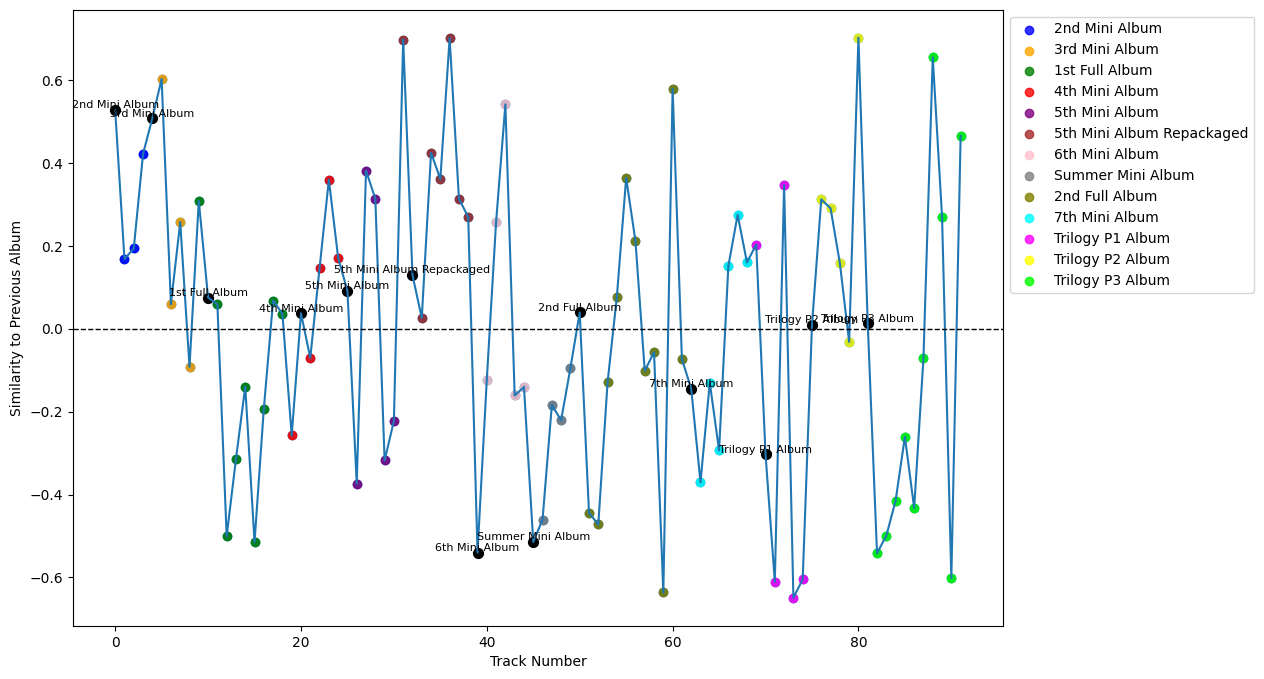

In [678]:
plt.figure(figsize=(12, 8))

# Plot scatter plots for each album number with distinct colors
colors = ['white', 'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'lime']
custom_labels1 = ['1st Mini Album', '2nd Mini Album', '3rd Mini Album', 
                  '1st Full Album', '4th Mini Album',  '5th Mini Album', 
                  '5th Mini Album Repackaged', '6th Mini Album', 
                  'Summer Mini Album',  '2nd Full Album', 
                  '7th Mini Album', 'Trilogy P1 Album', 'Trilogy P2 Album', 
                  'Trilogy P3 Album']


x = range(0, len(scores_list))
y = [scores_list[i][3] for i in x]
plt.scatter(x, y)
plt.plot(x, y)

albums = {}
for point in scores_list:
    album_num = point[2]
    if album_num not in albums:
        albums[album_num] = {'x': [], 'y': [], 'label': []}
    albums[album_num]['x'].append(point[0])
    albums[album_num]['y'].append(point[3])
    albums[album_num]['label'].append(point[1])


for album_num, album_data in albums.items():
    color = colors[album_num]  
    plt.scatter(album_data['x'], album_data['y'], label=custom_labels1[album_num], color=color, alpha=0.8)


title_tracks = [0, 4, 10, 20, 25, 32, 39, 45, 50, 62, 70, 75, 81]
title_y = [scores_list[i][3] for i in title_tracks]
plt.scatter(title_tracks, title_y, s = 50, color = "black")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  

custom_labels2 = ['2nd Mini Album', '3rd Mini Album', 
                  '1st Full Album', '4th Mini Album',  '5th Mini Album', 
                  '5th Mini Album Repackaged', '6th Mini Album', 
                  'Summer Mini Album',  '2nd Full Album', 
                  '7th Mini Album', 'Trilogy P1 Album', 'Trilogy P2 Album', 
                  'Trilogy P3 Album']
for i, label in enumerate(custom_labels2):
    plt.text(title_tracks[i], title_y[i], label, fontsize=8, ha='center', va='bottom')

plt.ylabel("Similarity to Previous Album")
plt.xlabel("Track Number")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
title_y

In [679]:
df.to_csv("cols.csv", index_label= False)

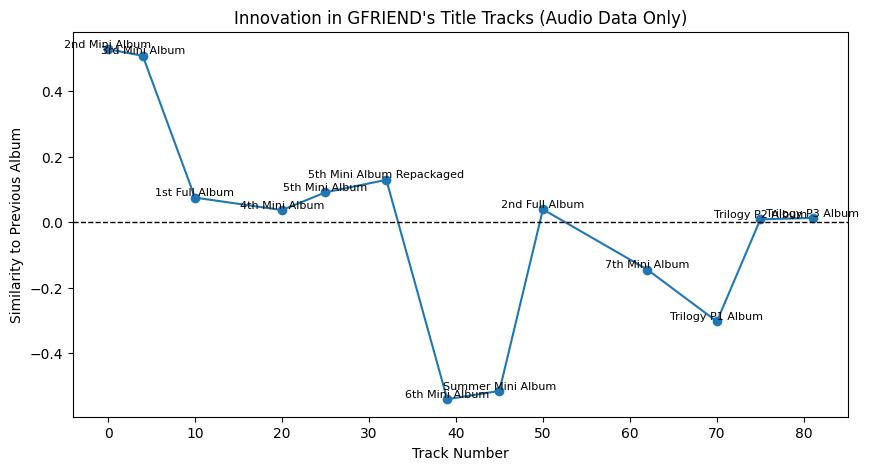

In [680]:
plt.figure(figsize=(10, 5))

plt.scatter(title_tracks, title_y)
plt.plot(title_tracks, title_y)

# Label each point with its corresponding index

for i, label in enumerate(custom_labels2):
    plt.text(title_tracks[i], title_y[i], label, fontsize=8, ha='center', va='bottom')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Dotted line at y=0

plt.ylabel("Similarity to Previous Album")
plt.xlabel("Track Number")
plt.title("Innovation in GFRIEND's Title Tracks (Audio Data Only)")
plt.show()


In [681]:
title_y

[0.5276,
 0.5075,
 0.075,
 0.037,
 0.091,
 0.1292,
 -0.54,
 -0.5147,
 0.0391,
 -0.1445,
 -0.3029,
 0.0087,
 0.013]

In [682]:
for title in title_tracks:
  print(df.iloc[title+3]["Track Name"])

Me Gustas Tu
Rough
NAVILLERA
FINGERTIP
LOVE WHISPER
Summer Rain
Time for the moon night
Sunny Summer
Sunrise
Fever
Crossroads
Apple
MAGO


92
92


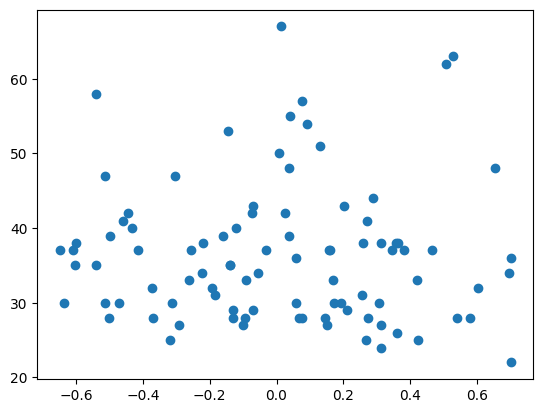

In [683]:
pop = df["Popularity"].iloc[3: len(df)].tolist()
pop
print(len(pop))
print(len(y))
plt.scatter(y, pop)


# add lyrical data

In [684]:
lyrics = pd.read_csv("/Users/andyouyang/Downloads/lyrics - song_data.csv")

In [685]:
# Append the column onto df2
# lyrics['Album ID'] = df['Album_ID']

column_to_append = df['Album_ID']

# Append the column onto df2, ignoring indices
lyrics['Album_ID'] = column_to_append.reset_index(drop=True)

lyrics

,Unnamed: 0,Album,Artist,Track Name,love song,happy/positive/hopeful/self,sad,calm/affectionate,bittersweet/yearning/nostaglia/comtemplation,anger,sensual/seductive,korean percent,sentiment intensity (1 to 5),Album_ID
0,1,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,Glass Bead,1,1,0,0,0,0,0,1.0000,4.0,1
1,2,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,Neverland,1,1,0,0,0,0,0,0.6567,4.0,1
2,3,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,White,1,1,0,0,0,0,0,1.0000,4.5,1
3,6,GFRIEND 2nd Mini Album 'Flower Bud',GFRIEND,Me Gustas Tu,1,1,0,0,0,0,0,0.9000,5.0,2
4,7,GFRIEND 2nd Mini Album 'Flower Bud',GFRIEND,Under The Sky,0,1,0,0,0,0,0,0.9762,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,106,Âõû:Walpurgis Night,GFRIEND,Night Drive,1,1,0,0,1,0,0,0.6091,3.0,14
91,107,Âõû:Walpurgis Night,GFRIEND,Apple,1,0,0,0,0,0,1,0.6537,4.5,14
92,108,Âõû:Walpurgis Night,GFRIEND,Crossroads,0,1,0,0,1,0,0,0.9048,3.0,14
93,109,Âõû:Walpurgis Night,GFRIEND,Labyrinth,0,0,0,0,0,1,0,0.7768,4.0,14


In [686]:
lyricalvar = ['Album', 'love song', 'happy/positive/hopeful/self', 'calm/affectionate', 'bittersweet/yearning/nostaglia/comtemplation', 'anger', 'sensual/seductive',
                    'korean percent', 'sentiment intensity (1 to 5)', 'Album_ID']
lyric_vectors = lyrics[lyricalvar]


lyric_feature = ['love song', 'happy/positive/hopeful/self', 'calm/affectionate', 'bittersweet/yearning/nostaglia/comtemplation', 'anger', 'sensual/seductive',
                    'korean percent', 'sentiment intensity (1 to 5)']

for feature in lyric_feature:
# z score for each val in col computed with respect to the entire col
    mean_val = lyric_vectors[feature].mean()
    std_val = lyric_vectors[feature].std()
    lyric_vectors[feature] = lyric_vectors[feature].apply(compute_z_score, args=(mean_val, std_val))

# # Compute average z-scores per album
average_l = lyric_vectors.groupby('Album').mean()

# average_z_scores
average_l


/var/folders/wb/2lj083gd7dg8hbpfljv38hbw0000gn/T/ipykernel_79249/635023022.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyric_vectors[feature] = lyric_vectors[feature].apply(compute_z_score, args=(mean_val, std_val))


,love song,happy/positive/hopeful/self,calm/affectionate,bittersweet/yearning/nostaglia/comtemplation,anger,sensual/seductive,korean percent,sentiment intensity (1 to 5),Album_ID
Album,,,,,,,,,
GFRIEND 1st Mini Album 'Season Of Glass',0.529902,0.759732,-0.430728,-0.885501,-0.145873,-0.179626,0.215183,0.304004,1.0
GFRIEND 2nd Mini Album 'Flower Bud',-0.069392,0.759732,-0.430728,-0.384771,-0.145873,-0.179626,0.221676,0.243331,2.0
GFRIEND 3rd Mini Album 'SNOWFLAKE',0.529902,-0.889972,-0.430728,0.716834,-0.145873,-0.179626,0.806204,0.206927,3.0
GFRIEND Summer Mini Album 'Sunny Summer',0.050467,0.347306,-0.430728,-0.484917,-0.145873,-0.179626,-0.465280,0.352543,9.0
GFRIEND The 1st Album 'LOL',0.050467,0.141093,-0.157933,-0.084333,-0.145873,-0.179626,0.500179,0.425350,4.0
GFRIEND The 2nd Album 'Time for us',0.529902,-0.271333,0.933243,-0.050951,-0.145873,-0.179626,-0.364926,0.061312,10.0
GFRIEND The 4th Mini Album 'THE AWAKENING',0.529902,-0.615021,0.478586,0.449778,-0.145873,-0.179626,0.789112,-0.060034,5.0
GFRIEND The 5th Mini Album <PARALLEL>,0.130373,0.072355,0.023929,0.115958,-0.145873,-0.179626,0.589389,-0.424073,6.0
GFRIEND The 5th Mini Album Repackage <RAINBOW>,-0.069392,-0.013567,-0.089735,0.115958,-0.145873,-0.179626,0.390870,-0.484746,7.0


In [687]:
lyric_vectors

,Album,love song,happy/positive/hopeful/self,calm/affectionate,bittersweet/yearning/nostaglia/comtemplation,anger,sensual/seductive,korean percent,sentiment intensity (1 to 5),Album_ID
0,GFRIEND 1st Mini Album 'Season Of Glass',0.529902,0.759732,-0.430728,-0.885501,-0.145873,-0.179626,0.934270,0.061312,1
1,GFRIEND 1st Mini Album 'Season Of Glass',0.529902,0.759732,-0.430728,-0.885501,-0.145873,-0.179626,-1.222992,0.061312,1
2,GFRIEND 1st Mini Album 'Season Of Glass',0.529902,0.759732,-0.430728,-0.885501,-0.145873,-0.179626,0.934270,0.789389,1
3,GFRIEND 2nd Mini Album 'Flower Bud',0.529902,0.759732,-0.430728,-0.885501,-0.145873,-0.179626,0.305880,1.517466,2
4,GFRIEND 2nd Mini Album 'Flower Bud',-1.867275,0.759732,-0.430728,-0.885501,-0.145873,-0.179626,0.784714,-1.394842,2
...,...,...,...,...,...,...,...,...,...,...
90,Âõû:Walpurgis Night,0.529902,0.759732,-0.430728,1.117417,-0.145873,-0.179626,-1.522106,-1.394842,14
91,Âõû:Walpurgis Night,0.529902,-1.302398,-0.430728,-0.885501,-0.145873,5.508526,-1.241844,0.789389,14
92,Âõû:Walpurgis Night,-1.867275,0.759732,-0.430728,1.117417,-0.145873,-0.179626,0.336043,-1.394842,14
93,Âõû:Walpurgis Night,-1.867275,-1.302398,-0.430728,-0.885501,6.783106,-0.179626,-0.468296,0.061312,14


In [688]:
len(df)

95

In [689]:
lyrics_list = []

prev_album_num = 1
for i in range(3, len(df)):   # 5 is the start of second album  
  curr_track = lyric_vectors.iloc[i] # locks the ith row
  name = df.iloc[i]["Track Name"]
  curr_track_df = pd.DataFrame(curr_track).transpose()

  if curr_track["Album_ID"] != prev_album_num + 1 : 
    # the current album id is not the one after the recorded number then change it to the current one
    prev_album_num += 1
  previous_album_avg_vector = average_l[average_l['Album_ID'] == prev_album_num]

  # print(i, prev_album_num,'\n')
  # print("before dropping\n", previous_album_avg_vector)
  previous_album_avg_vector = previous_album_avg_vector.drop(columns = ["Album_ID"])
  
  curr_track_df = curr_track_df.drop(columns = ["Album", "Album_ID"])
  # print("after dropping\n", previous_album_avg_vector)
  # print("after\n", curr_track)
  
  similarity_score = round(cosine_similarity(curr_track_df, 
                                            previous_album_avg_vector)[0][0], 4)
  lyrics_list.append([i-3, name, prev_album_num, similarity_score])

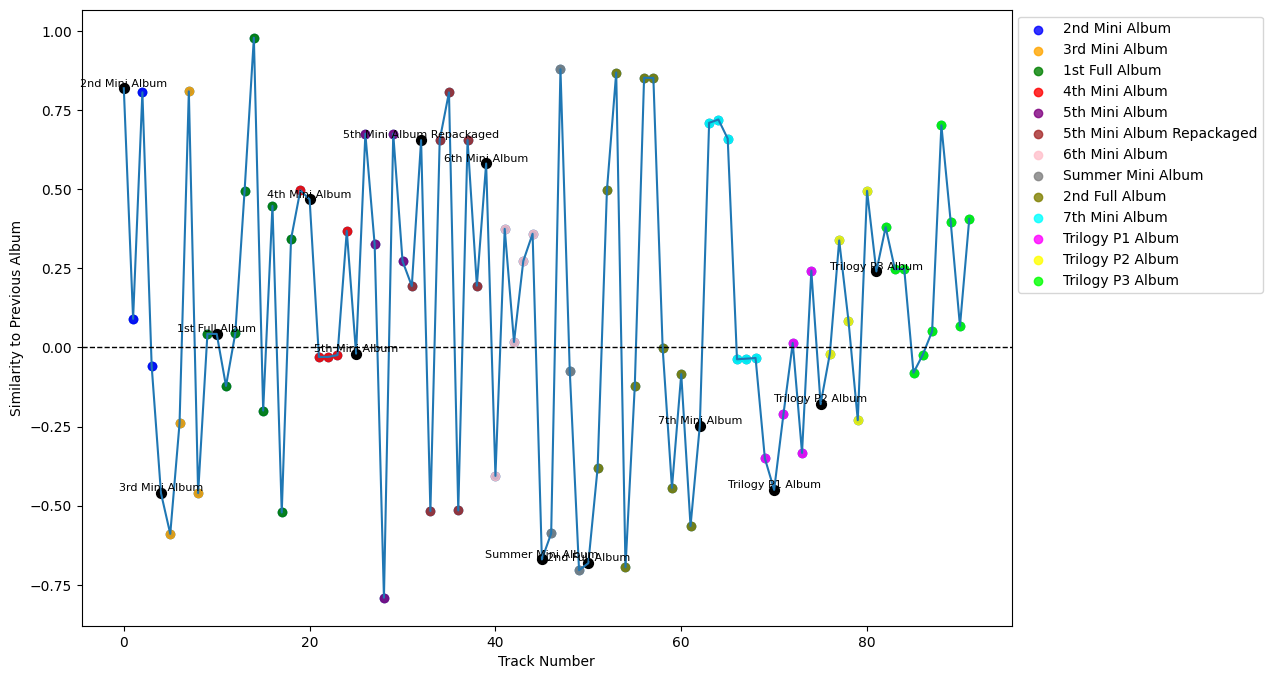

In [721]:
plt.figure(figsize=(12, 8))

x = range(0, len(scores_list))
y = [lyrics_list[i][3] for i in x]
plt.scatter(x, y)
plt.plot(x, y)

albums = {}
for point in lyrics_list:
    album_num = point[2]
    if album_num not in albums:
        albums[album_num] = {'x': [], 'y': [], 'label': []}
    albums[album_num]['x'].append(point[0])
    albums[album_num]['y'].append(point[3])
    albums[album_num]['label'].append(point[1])


for album_num, album_data in albums.items():
    color = colors[album_num]  # Use distinct color from tab10 colormap
    plt.scatter(album_data['x'], album_data['y'], 
                label=custom_labels1[album_num], color=color, alpha=0.8)


title_tracks = [3-3, 7-3, 13-3, 23-3, 28-3, 35-3, 42-3, 48-3, 53-3, 65-3, 73-3, 78-3, 81]
title_y = [lyrics_list[i][3] for i in title_tracks]
plt.scatter(title_tracks, title_y, s = 50, color = "black")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Dotted line at y=0


for i, label in enumerate(custom_labels2):
    plt.text(title_tracks[i], title_y[i], label, fontsize=8, ha='center', va='bottom')

plt.ylabel("Similarity to Previous Album")
plt.xlabel("Track Number")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

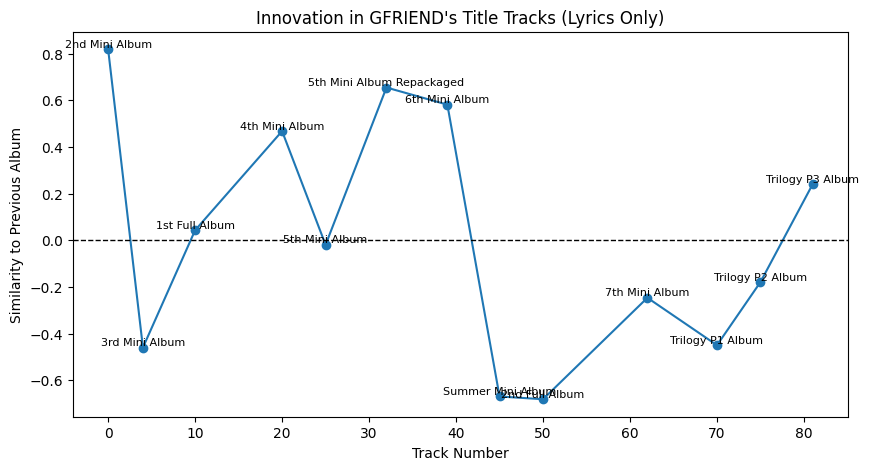

[63, 62, 57, 48, 54, 51, 58, 47, 55, 53, 47, 50, 67]

In [722]:
plt.figure(figsize=(10, 5))

plt.scatter(title_tracks, title_y)
plt.plot(title_tracks, title_y)

# Label each point with its corresponding index

for i, label in enumerate(custom_labels2):
    plt.text(title_tracks[i], title_y[i], label, fontsize=8, ha='center', va='bottom')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Dotted line at y=0

plt.ylabel("Similarity to Previous Album")
plt.xlabel("Track Number")
plt.title("Innovation in GFRIEND's Title Tracks (Lyrics Only)")
plt.show()

pop_y = []
for i in title_tracks:
    val = df.iloc[i+3]["Popularity"]
    pop_y.append(val)
pop_y



In [723]:
title_y

[0.8193,
 -0.4601,
 0.043,
 0.4681,
 -0.0194,
 0.6551,
 0.5815,
 -0.6699,
 -0.6816,
 -0.2466,
 -0.45,
 -0.179,
 0.2405]

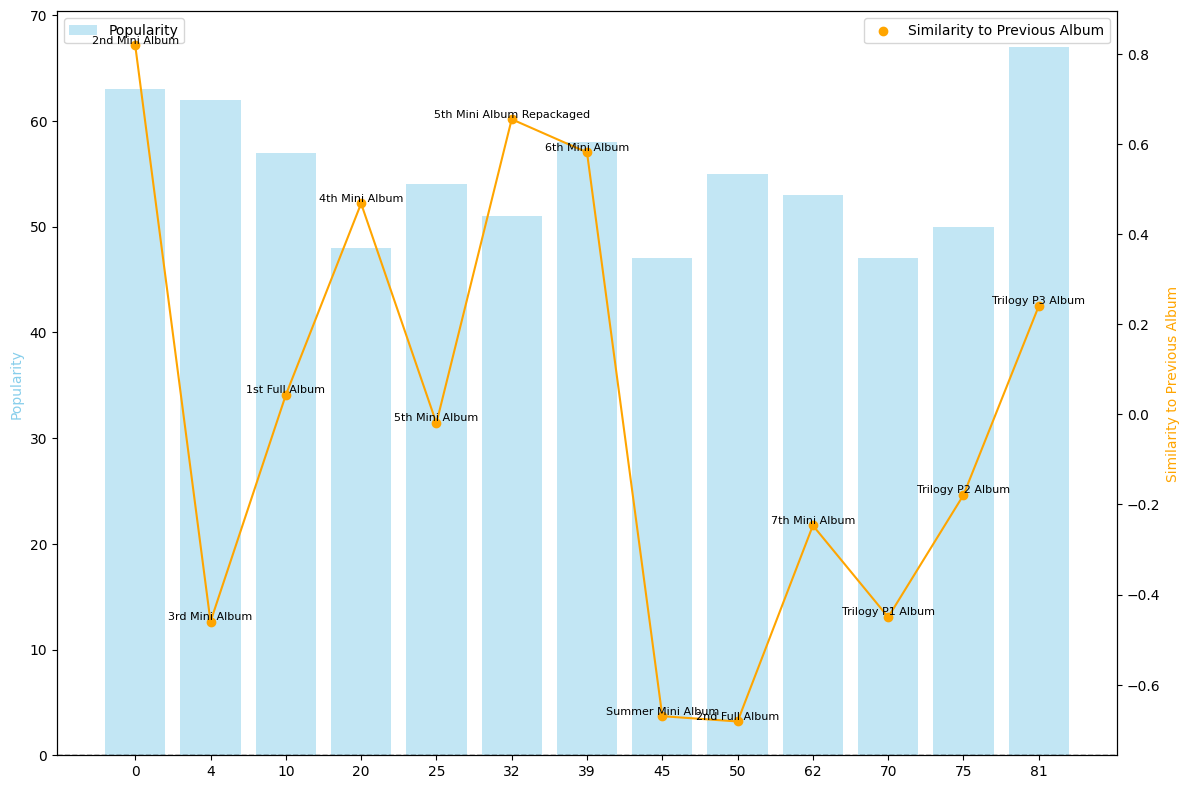

In [724]:
# Your existing code for plotting the bar graph
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot popularity as bar plot
ax1.bar(range(len(title_tracks)), pop_y, alpha=0.5, color='skyblue', label='Popularity')

# Set y-axis label for popularity
ax1.set_ylabel("Popularity", color='skyblue')

# Create a second y-axis for similarity to previous album
ax2 = ax1.twinx()

# Plot similarity to previous album as scatter plot
ax2.scatter(range(len(title_tracks)), title_y, label='Similarity to Previous Album', color='orange')
ax2.plot(range(len(title_tracks)), title_y, color='orange')

# Label each point with its corresponding index
for i, label in enumerate(custom_labels2):
    ax2.text(i, title_y[i], label, fontsize=8, ha='center', va='bottom')

# Set y-axis label for similarity to previous album
ax2.set_ylabel("Similarity to Previous Album", color='orange')

# Add horizontal line at y=0
ax1.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Set x-axis ticks and labels
plt.xticks(range(len(title_tracks)), title_tracks, rotation=90)

# Show legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


# final combination

In [725]:
vectors_reset = vectors.reset_index(drop=True)
finalappend_reset = lyric_vectors.reset_index(drop=True)

finalappend = lyric_vectors[['love song', 'happy/positive/hopeful/self', 'calm/affectionate', 'bittersweet/yearning/nostaglia/comtemplation', 'anger', 'sensual/seductive',
                    'korean percent', 'sentiment intensity (1 to 5)']]

# final = pd.concat([vectors, finalappend], )
final = vectors_reset.merge(finalappend_reset, left_index=True, right_index=True)

final = final.drop(columns = ["Album_y", "Album_ID_y"])
final

,Album_x,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,Album_ID_x,love song,happy/positive/hopeful/self,calm/affectionate,bittersweet/yearning/nostaglia/comtemplation,anger,sensual/seductive,korean percent,sentiment intensity (1 to 5)
0,GFRIEND 1st Mini Album 'Season Of Glass',1.946395,0.588482,0.167393,0.204531,0.236312,0.794491,-0.698736,0.108234,-0.117877,...,-0.430583,1,0.529902,0.759732,-0.430728,-0.885501,-0.145873,-0.179626,0.934270,0.061312
1,GFRIEND 1st Mini Album 'Season Of Glass',-0.392861,1.035339,0.437629,1.617657,-0.417858,0.794491,0.132757,-0.981590,0.646044,...,0.103253,1,0.529902,0.759732,-0.430728,-0.885501,-0.145873,-0.179626,-1.222992,0.061312
2,GFRIEND 1st Mini Album 'Season Of Glass',0.245118,0.306767,-0.445835,-1.915158,-0.454688,0.794491,0.097870,0.077273,-0.117877,...,-1.186511,1,0.529902,0.759732,-0.430728,-0.885501,-0.145873,-0.179626,0.934270,0.789389
3,GFRIEND 2nd Mini Album 'Flower Bud',2.797034,0.112481,0.718259,0.911094,1.421008,0.794491,0.039723,-0.102300,-0.117877,...,-0.783157,2,0.529902,0.759732,-0.430728,-0.885501,-0.145873,-0.179626,0.305880,1.517466
4,GFRIEND 2nd Mini Album 'Flower Bud',-0.392861,0.093053,0.541566,-1.208595,0.083730,0.794491,-0.189955,-0.201375,-0.117877,...,-0.164909,2,-1.867275,0.759732,-0.430728,-0.885501,-0.145873,-0.179626,0.784714,-1.394842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,回:Walpurgis Night,0.670437,-0.208090,-2.129614,-0.148750,-0.850172,-1.245418,-0.384745,2.925678,-0.117877,...,-1.544194,14,0.529902,0.759732,-0.430728,1.117417,-0.145873,-0.179626,-1.522106,-1.394842
91,回:Walpurgis Night,1.202087,0.743911,0.884558,1.264376,-1.574494,0.794491,2.880174,-0.865177,-0.117877,...,-0.165175,14,0.529902,-1.302398,-0.430728,-0.885501,-0.145873,5.508526,-1.241844,0.789389
92,回:Walpurgis Night,0.457778,-2.510379,-0.206780,-1.561876,0.918542,0.794491,-0.088199,-0.021802,-0.117877,...,2.051917,14,-1.867275,0.759732,-0.430728,1.117417,-0.145873,-0.179626,0.336043,-1.394842
93,回:Walpurgis Night,0.138788,-0.110947,0.458417,-1.208595,0.428353,-1.245418,-0.219028,0.225886,-0.117877,...,0.055405,14,-1.867275,-1.302398,-0.430728,-0.885501,6.783106,-0.179626,-0.468296,0.061312


In [726]:
feature_columns = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'love song', 
                    'happy/positive/hopeful/self', 'calm/affectionate', 'bittersweet/yearning/nostaglia/comtemplation', 
                    'anger', 'sensual/seductive', 'korean percent', 'sentiment intensity (1 to 5)']

for feature in feature_columns:
# z score for each val in col computed with respect to the entire col
    mean_val = final[feature].mean()
    std_val = final[feature].std()
    final[feature] = final[feature].apply(compute_z_score, args=(mean_val, std_val))

# # Compute average z-scores per album
fin_avg = final.groupby('Album_x').mean()

# average_z_scores
fin_avg

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,Album_ID_x,love song,happy/positive/hopeful/self,calm/affectionate,bittersweet/yearning/nostaglia/comtemplation,anger,sensual/seductive,korean percent,sentiment intensity (1 to 5)
Album_x,,,,,,,,,,,,,,,,,,,,,
GFRIEND 1st Mini Album 'Season Of Glass',0.599551,0.643530,0.053063,-0.030990,-0.212078,0.794491,-0.156036,-0.265361,0.136763,-0.134018,...,-0.504614,1.0,0.529902,0.759732,-0.430728,-0.885501,-0.145873,-0.179626,0.215183,0.304004
GFRIEND 2nd Mini Album 'Flower Bud',0.324866,0.321339,0.455818,-0.148750,0.106968,0.794491,-0.257550,0.188732,-0.117877,0.266041,...,-0.586745,2.0,-0.069392,0.759732,-0.430728,-0.384771,-0.145873,-0.179626,0.221676,0.243331
GFRIEND 3rd Mini Album 'SNOWFLAKE',0.223852,-0.270262,0.136212,0.133875,-0.057626,0.386509,-0.047496,-0.041864,-0.117877,0.482859,...,-0.872411,3.0,0.529902,-0.889972,-0.430728,0.716834,-0.145873,-0.179626,0.806204,0.206927
GFRIEND Summer Mini Album 'Sunny Summer',0.032459,0.537967,0.664212,0.345844,0.548314,0.386509,0.300800,-0.206577,-0.117877,-0.196720,...,0.127982,9.0,0.050467,0.347306,-0.430728,-0.484917,-0.145873,-0.179626,-0.465280,0.352543
GFRIEND The 1st Album 'LOL',-0.297164,0.093053,0.097755,-0.042766,0.063386,-0.021473,0.312139,0.007240,-0.116127,0.085650,...,0.592858,4.0,0.050467,0.141093,-0.157933,-0.084333,-0.145873,-0.179626,0.500179,0.425350
GFRIEND The 2nd Album 'Time for us',-0.251088,0.335910,-0.452764,0.204531,-0.223113,-0.395456,-0.114849,0.312715,-0.117877,-0.133902,...,-0.295173,10.0,0.529902,-0.271333,0.933243,-0.050951,-0.145873,-0.179626,-0.364926,0.061312
GFRIEND The 4th Mini Album 'THE AWAKENING',-0.180201,0.243624,0.371803,0.263412,0.044854,-0.225464,-0.182202,0.331050,-0.074970,-0.295524,...,0.115301,5.0,0.529902,-0.615021,0.478586,0.449778,-0.145873,-0.179626,0.789112,-0.060034
GFRIEND The 5th Mini Album <PARALLEL>,-0.197923,0.178862,0.207236,-0.207630,0.122168,-0.565449,-0.421087,-0.231923,-0.117877,0.561017,...,-0.107657,6.0,0.130373,0.072355,0.023929,0.115958,-0.145873,-0.179626,0.589389,-0.424073
GFRIEND The 5th Mini Album Repackage <RAINBOW>,-0.592229,-0.062376,0.257039,-0.192910,0.178546,-0.225464,-0.463607,-0.381181,-0.117877,0.463030,...,-0.209147,7.0,-0.069392,-0.013567,-0.089735,0.115958,-0.145873,-0.179626,0.390870,-0.484746


In [727]:
fin_list = []

prev_album_num = 1
for i in range(3, len(df)):   # 5 is the start of second album  
  curr_track = final.iloc[i] # locks the ith row
  name = df.iloc[i]["Track Name"]
  curr_track_df = pd.DataFrame(curr_track).transpose()

  if curr_track["Album_ID_x"] != prev_album_num + 1 : 
    # the current album id is not the one after the recorded number then change it to the current one
    prev_album_num += 1
  previous_album_avg_vector = fin_avg[fin_avg['Album_ID_x'] == prev_album_num]

  # print(i, prev_album_num,'\n')
  # print("before dropping\n", previous_album_avg_vector)
  previous_album_avg_vector = previous_album_avg_vector.drop(columns = ["Album_ID_x"])
  
  curr_track_df = curr_track_df.drop(columns = ["Album_x", "Album_ID_x"])
  # print("after dropping\n", previous_album_avg_vector)
  # print("after\n", curr_track)
  
  similarity_score = round(cosine_similarity(curr_track_df, 
                                            previous_album_avg_vector)[0][0], 4)
  fin_list.append([i-3, name, prev_album_num, similarity_score])

In [728]:
fin_list

[[0, 'Me Gustas Tu', 1, 0.6065],
 [1, 'Under The Sky', 1, 0.1254],
 [2, 'One', 1, 0.4372],
 [3, 'My Buddy', 1, 0.206],
 [4, 'Rough', 2, 0.2033],
 [5, 'Say my name', 2, 0.0953],
 [6, 'Luv Star', 2, -0.0138],
 [7, 'Someday', 2, 0.425],
 [8, 'TRUST', 2, -0.174],
 [9, 'Fall in Love', 3, 0.1579],
 [10, 'NAVILLERA', 3, 0.0551],
 [11, 'LOL', 3, -0.0454],
 [12, 'Distance', 3, -0.2247],
 [13, 'Water Flower', 3, 0.0406],
 [14, 'Mermaid', 3, 0.1184],
 [15, 'Sunshine', 3, -0.3372],
 [16, 'Compas', 3, 0.0794],
 [17, 'Click', 3, -0.2461],
 [18, 'Gone with the wind', 3, 0.2255],
 [19, 'Hear The Wind Sing', 4, 0.0814],
 [20, 'FINGERTIP', 4, 0.1626],
 [21, 'Contrail', 4, -0.0528],
 [22, 'Please Save My Earth', 4, 0.049],
 [23, 'Rain In The Spring Time', 4, 0.2127],
 [24, 'Crush', 4, 0.249],
 [25, 'LOVE WHISPER', 5, 0.0355],
 [26, 'AVE MARIA', 5, 0.2983],
 [27, 'ONE-HALF', 5, 0.3394],
 [28, 'LIFE IS A PARTY', 5, -0.3582],
 [29, 'RED UMBRELLA', 5, 0.2607],
 [30, 'FALLING ASLEEP AGAIN', 5, 0.0276],
 [31, 

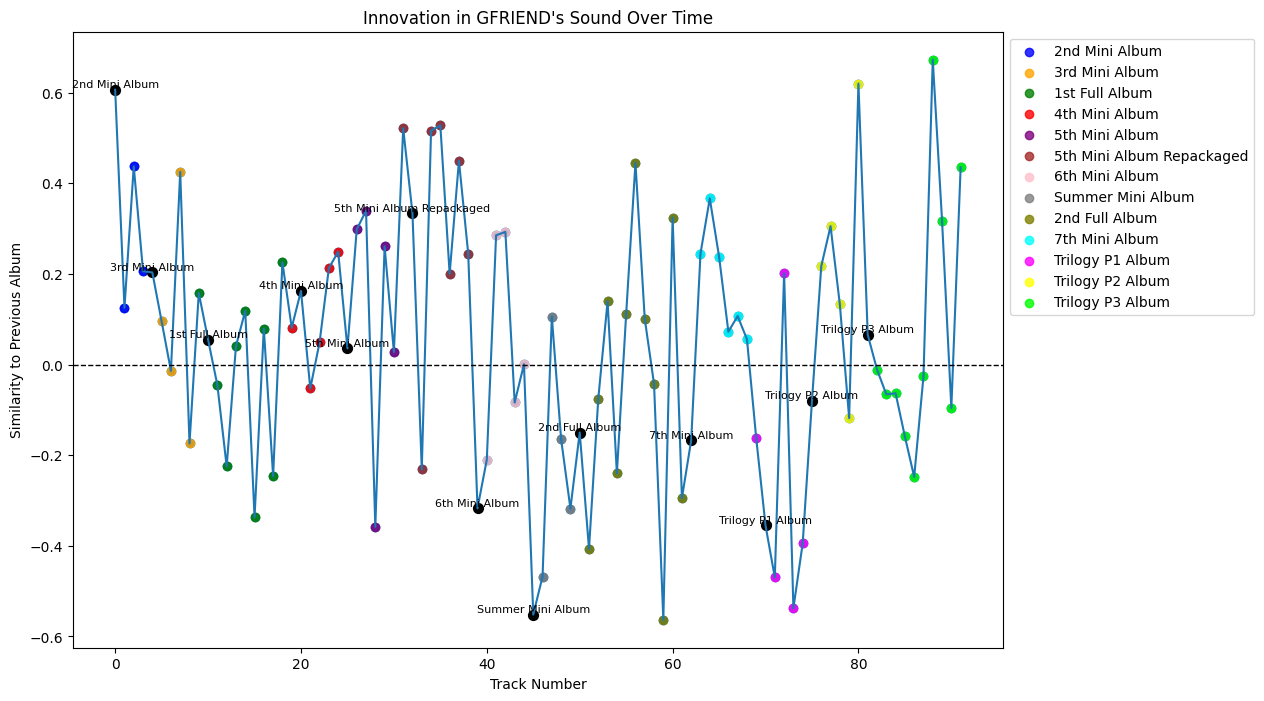

In [729]:
plt.figure(figsize=(12, 8))

x = range(0, len(fin_list))
y = [fin_list[i][3] for i in x]
plt.scatter(x, y)
plt.plot(x, y)

albums = {}
for point in fin_list:
    album_num = point[2]
    if album_num not in albums:
        albums[album_num] = {'x': [], 'y': [], 'label': []}
    albums[album_num]['x'].append(point[0])
    albums[album_num]['y'].append(point[3])
    albums[album_num]['label'].append(point[1])


for album_num, album_data in albums.items():
    color = colors[album_num]  # Use distinct color from tab10 colormap
    plt.scatter(album_data['x'], album_data['y'], 
                label=custom_labels1[album_num], color=color, alpha=0.8)


title_tracks = [3-3, 7-3, 13-3, 23-3, 28-3, 35-3, 42-3, 48-3, 53-3, 65-3, 73-3, 78-3, 81]
title_y = [fin_list[i][3] for i in title_tracks]
plt.scatter(title_tracks, title_y, s = 50, color = "black")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Dotted line at y=0


for i, label in enumerate(custom_labels2):
    plt.text(title_tracks[i], title_y[i], label, fontsize=8, ha='center', va='bottom')

plt.ylabel("Similarity to Previous Album")
plt.xlabel("Track Number")
plt.title("Innovation in GFRIEND's Sound Over Time")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

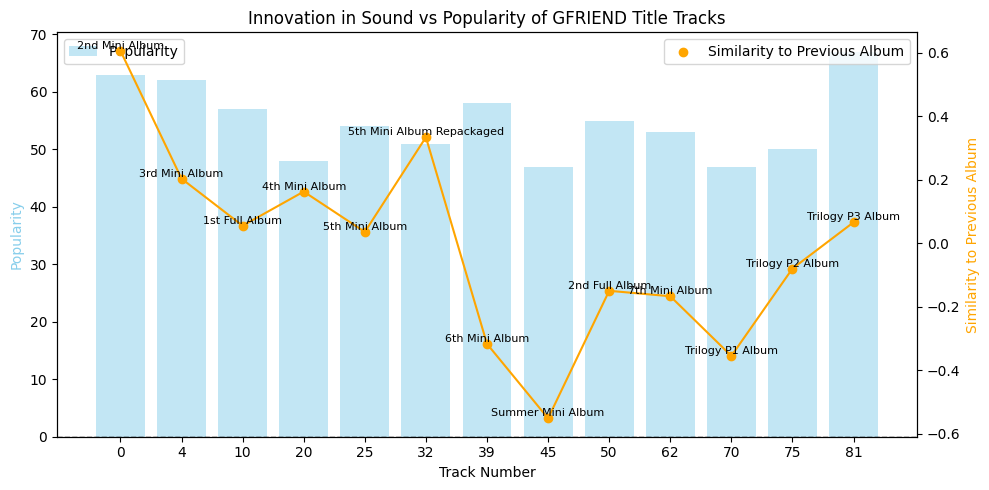

In [730]:
# Your existing code for plotting the bar graph
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot popularity as bar plot
ax1.bar(range(len(title_tracks)), pop_y, alpha=0.5, color='skyblue', label='Popularity')

# Set y-axis label for popularity
ax1.set_ylabel("Popularity", color='skyblue')

# Create a second y-axis for similarity to previous album
ax2 = ax1.twinx()

# Plot similarity to previous album as scatter plot
ax2.scatter(range(len(title_tracks)), title_y, label='Similarity to Previous Album', color='orange')
ax2.plot(range(len(title_tracks)), title_y, color='orange')

# Label each point with its corresponding index
for i, label in enumerate(custom_labels2):
    ax2.text(i, title_y[i], label, fontsize=8, ha='center', va='bottom')

# Set y-axis label for similarity to previous album
ax2.set_ylabel("Similarity to Previous Album", color='orange')

# Add horizontal line at y=0
ax1.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Set x-axis ticks and labels
plt.xticks(range(len(title_tracks)), title_tracks, rotation=90)

# Show legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xlabel("Track Number")
ax1.set_title("Innovation in Sound vs Popularity of GFRIEND Title Tracks")
plt.tight_layout()
plt.show()

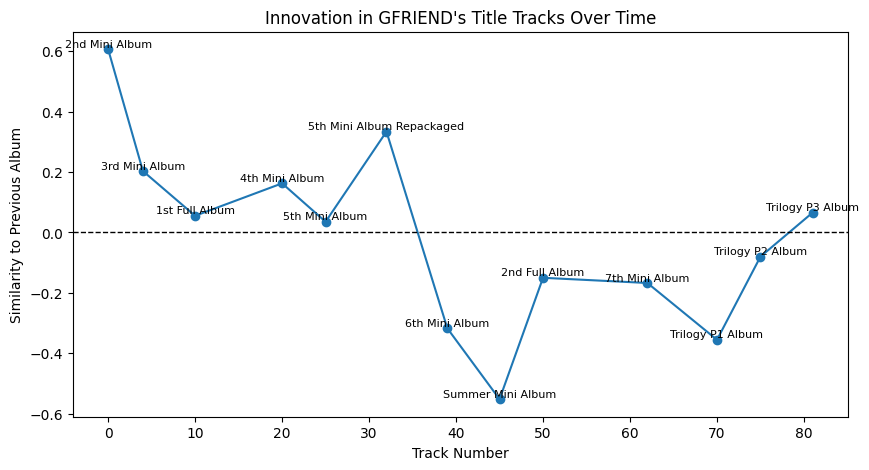

In [731]:
plt.figure(figsize=(10, 5))

plt.scatter(title_tracks, title_y)
plt.plot(title_tracks, title_y)

# Label each point with its corresponding index

for i, label in enumerate(custom_labels2):
    plt.text(title_tracks[i], title_y[i], label, fontsize=8, ha='center', va='bottom')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Dotted line at y=0

plt.ylabel("Similarity to Previous Album")
plt.xlabel("Track Number")
plt.title("Innovation in GFRIEND's Title Tracks Over Time")
plt.show()

In [ ]:
# pop = final["Popularity"].iloc[3: len(df)].tolist()
# pop
# print(len(pop))
# print(len(y))
# plt.scatter(y, pop)

# pop_y = []
# for i in title_tracks:
#     val = df.iloc[i+3]["Popularity"]
#     pop_y.append(val)
# pop_y

In [736]:
lyrics

,Unnamed: 0,Album,Artist,Track Name,love song,happy/positive/hopeful/self,sad,calm/affectionate,bittersweet/yearning/nostaglia/comtemplation,anger,sensual/seductive,korean percent,sentiment intensity (1 to 5),Album_ID
0,1,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,Glass Bead,1,1,0,0,0,0,0,1.0000,4.0,1
1,2,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,Neverland,1,1,0,0,0,0,0,0.6567,4.0,1
2,3,GFRIEND 1st Mini Album 'Season Of Glass',GFRIEND,White,1,1,0,0,0,0,0,1.0000,4.5,1
3,6,GFRIEND 2nd Mini Album 'Flower Bud',GFRIEND,Me Gustas Tu,1,1,0,0,0,0,0,0.9000,5.0,2
4,7,GFRIEND 2nd Mini Album 'Flower Bud',GFRIEND,Under The Sky,0,1,0,0,0,0,0,0.9762,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,106,Âõû:Walpurgis Night,GFRIEND,Night Drive,1,1,0,0,1,0,0,0.6091,3.0,14
91,107,Âõû:Walpurgis Night,GFRIEND,Apple,1,0,0,0,0,0,1,0.6537,4.5,14
92,108,Âõû:Walpurgis Night,GFRIEND,Crossroads,0,1,0,0,1,0,0,0.9048,3.0,14
93,109,Âõû:Walpurgis Night,GFRIEND,Labyrinth,0,0,0,0,0,1,0,0.7768,4.0,14


<Axes: title={'center': 'Mean Korean Percentage by Album'}, xlabel='Album', ylabel='Mean Korean Percentage'>

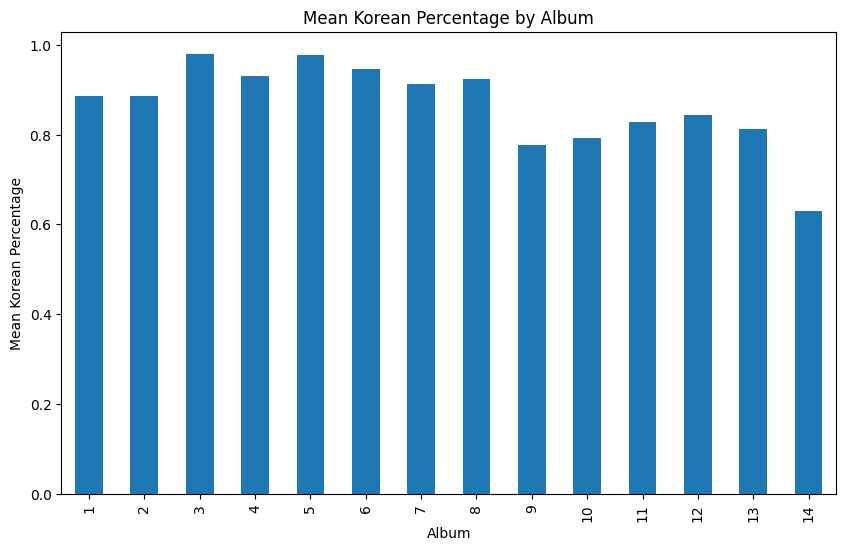

In [741]:
mean_korean_percent = lyrics.groupby("Album_ID")["korean percent"].mean()

mean_korean_percent.plot(kind="bar", figsize=(10, 6), ylabel="Mean Korean Percentage", xlabel="Album", title="Mean Korean Percentage by Album")